# Economic Data Analysis with Fred (Federal Reserve Economic Data) & Pandas

## Pulling Data  

The data was pulled from the FRED website using an API, in order to do that fredapi was first installed 

In [2]:
!pip install fredapi

After installing fredapi all of the libriaries needed for the anlaysis were also installed  

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time



In [6]:
plt.style.use('fivethirtyeight')



In [8]:
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]



In [ ]:
 from fredapi import Fred


In [10]:
fred_key='YOUR-API-KEY-HERE'

In [12]:
pd.set_option('display.max_columns', 500)

## A FRED Object was then created 

In [13]:
fred = Fred(api_key=fred_key)

## SP500 was searched and plotted 

In [14]:
sp_search = fred.search('S&P', order_by='popularity')

In [15]:
sp_search.head()

id realtime_start realtime_end   
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2023-10-26   2023-10-26  \
CSUSHPINSA          CSUSHPINSA     2023-10-26   2023-10-26   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2023-10-26   2023-10-26   
SP500                    SP500     2023-10-26   2023-10-26   
MEHOINUSA672N    MEHOINUSA672N     2023-10-26   2023-10-26   

                                                            title   
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...  \
CSUSHPINSA        S&P/Case-Shiller U.S. National Home Price Index   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   

               observation_start observation_end     frequency   
series id                                                        
BAMLH0A0HYM2          1996-12-31      2023-10-25  Daily, Close  \
CSUSHPINSA            1987-01-01      2023-07-01       Monthly   
BAMLH0A0HYM2EY        1996-12-31      2023-10-25  Daily, Close   
SP500                 2013-10-28      2023-10-25  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   

               frequency_short                           units   
series id                                                        
BAMLH0A0HYM2                 D                         Percent  \
CSUSHPINSA                   M              Index Jan 2000=100   
BAMLH0A0HYM2EY               D                         Percent   
SP500                        D                           Index   
MEHOINUSA672N                A  2021 CPI-U-RS Adjusted Dollars   

                             units_short      seasonal_adjustment   
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted  \
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2021 CPI-U-RS Adjusted $  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated   
series id                                                             
BAMLH0A0HYM2                         NSA  2023-10-26 09:22:02-05:00  \
CSUSHPINSA                           NSA  2023-09-26 08:11:02-05:00   
BAMLH0A0HYM2EY                       NSA  2023-10-26 09:22:06-05:00   
SP500                                NSA  2023-10-25 19:10:52-05:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           93  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             89  For more information regarding the index, plea...  
BAMLH0A0HYM2EY         83  This data represents the effective yield of th...  
SP500                  82  The observations for the S&P 500 represent the...  
MEHOINUSA672N          81  Household data are collected as of March.  As ...

In [16]:
sp500 = fred.get_series(series_id='SP500')

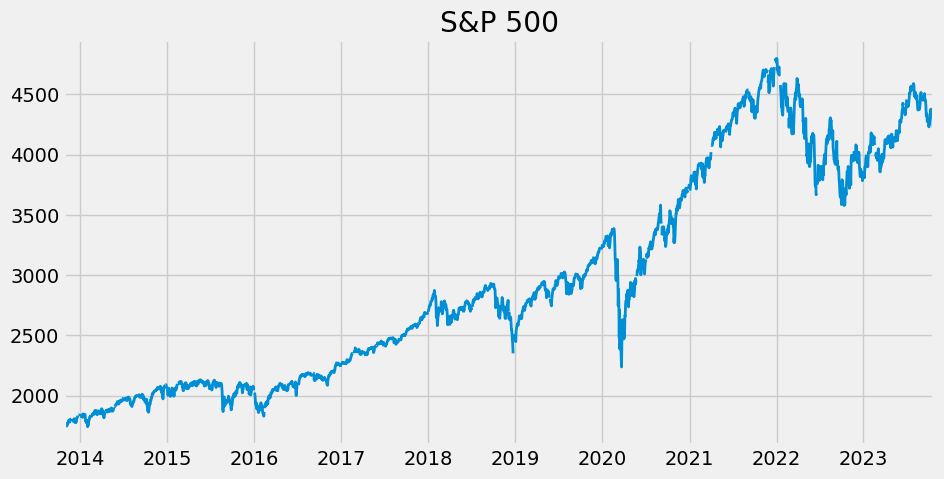

In [17]:
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)
plt.show()

In [18]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [20]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) 
uemp_results = pd.concat(all_results, axis=1)

In [21]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [22]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

## Plot States Unemployment Rate  

In [23]:
px.line(uemp_states)

It is clear that Covid had an enermous effect on unemployment, in early 2020. 

## Creating a Bar Graph of Unemployment Rates per State 

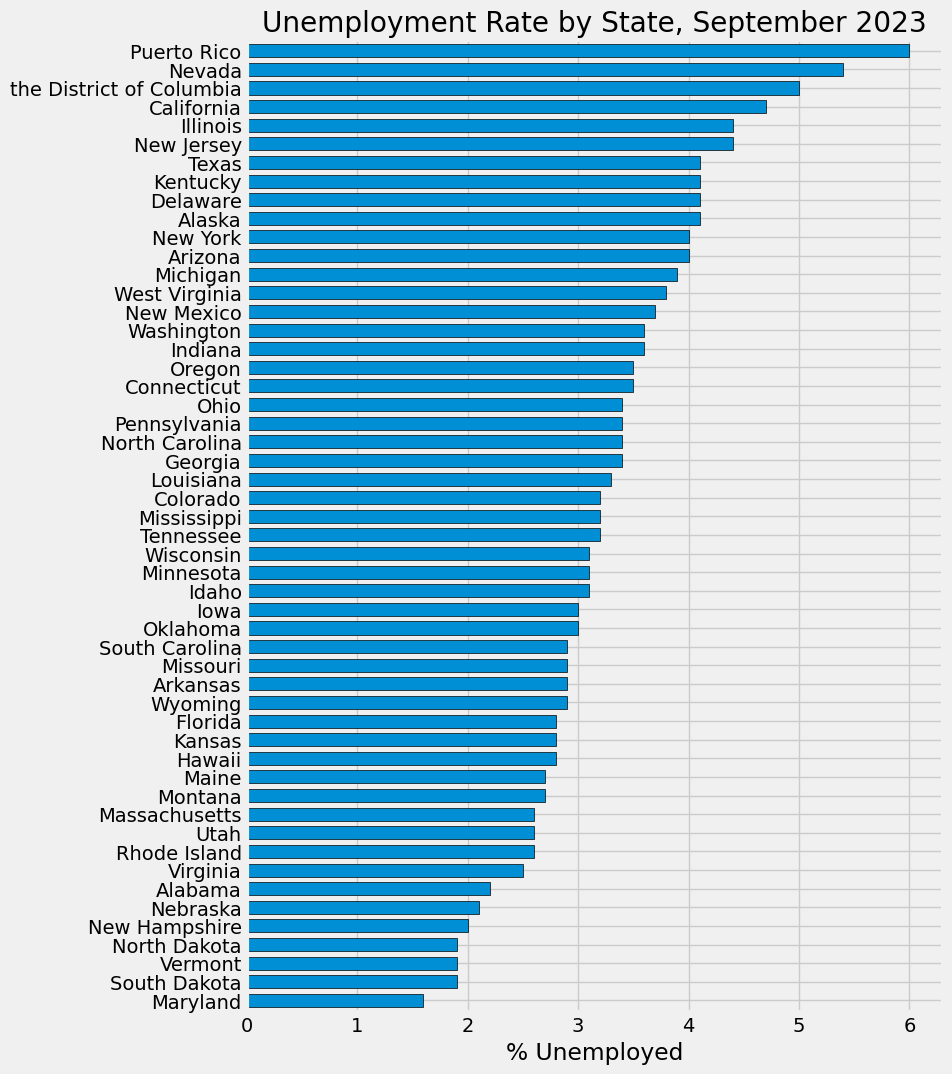

In [26]:
ax = uemp_states.loc[uemp_states.index == '2023-9-01'].T \
    .sort_values('2023-9-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, September 2023')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

Interesting to see Illinois being as high as it is, lets take a look at Illinois further down in the analysis. For now lets compare particiaption rate vs unemployment rate using data from FRED. 

    The participation rate measures the percentage of Americans who are in the labor force. The unemployment rate measures the percentage of the labor force that is currently without a job. A high participation rate combined with a low unemployment rate is a sure sign of a robust job market.



In [27]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [28]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) 
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

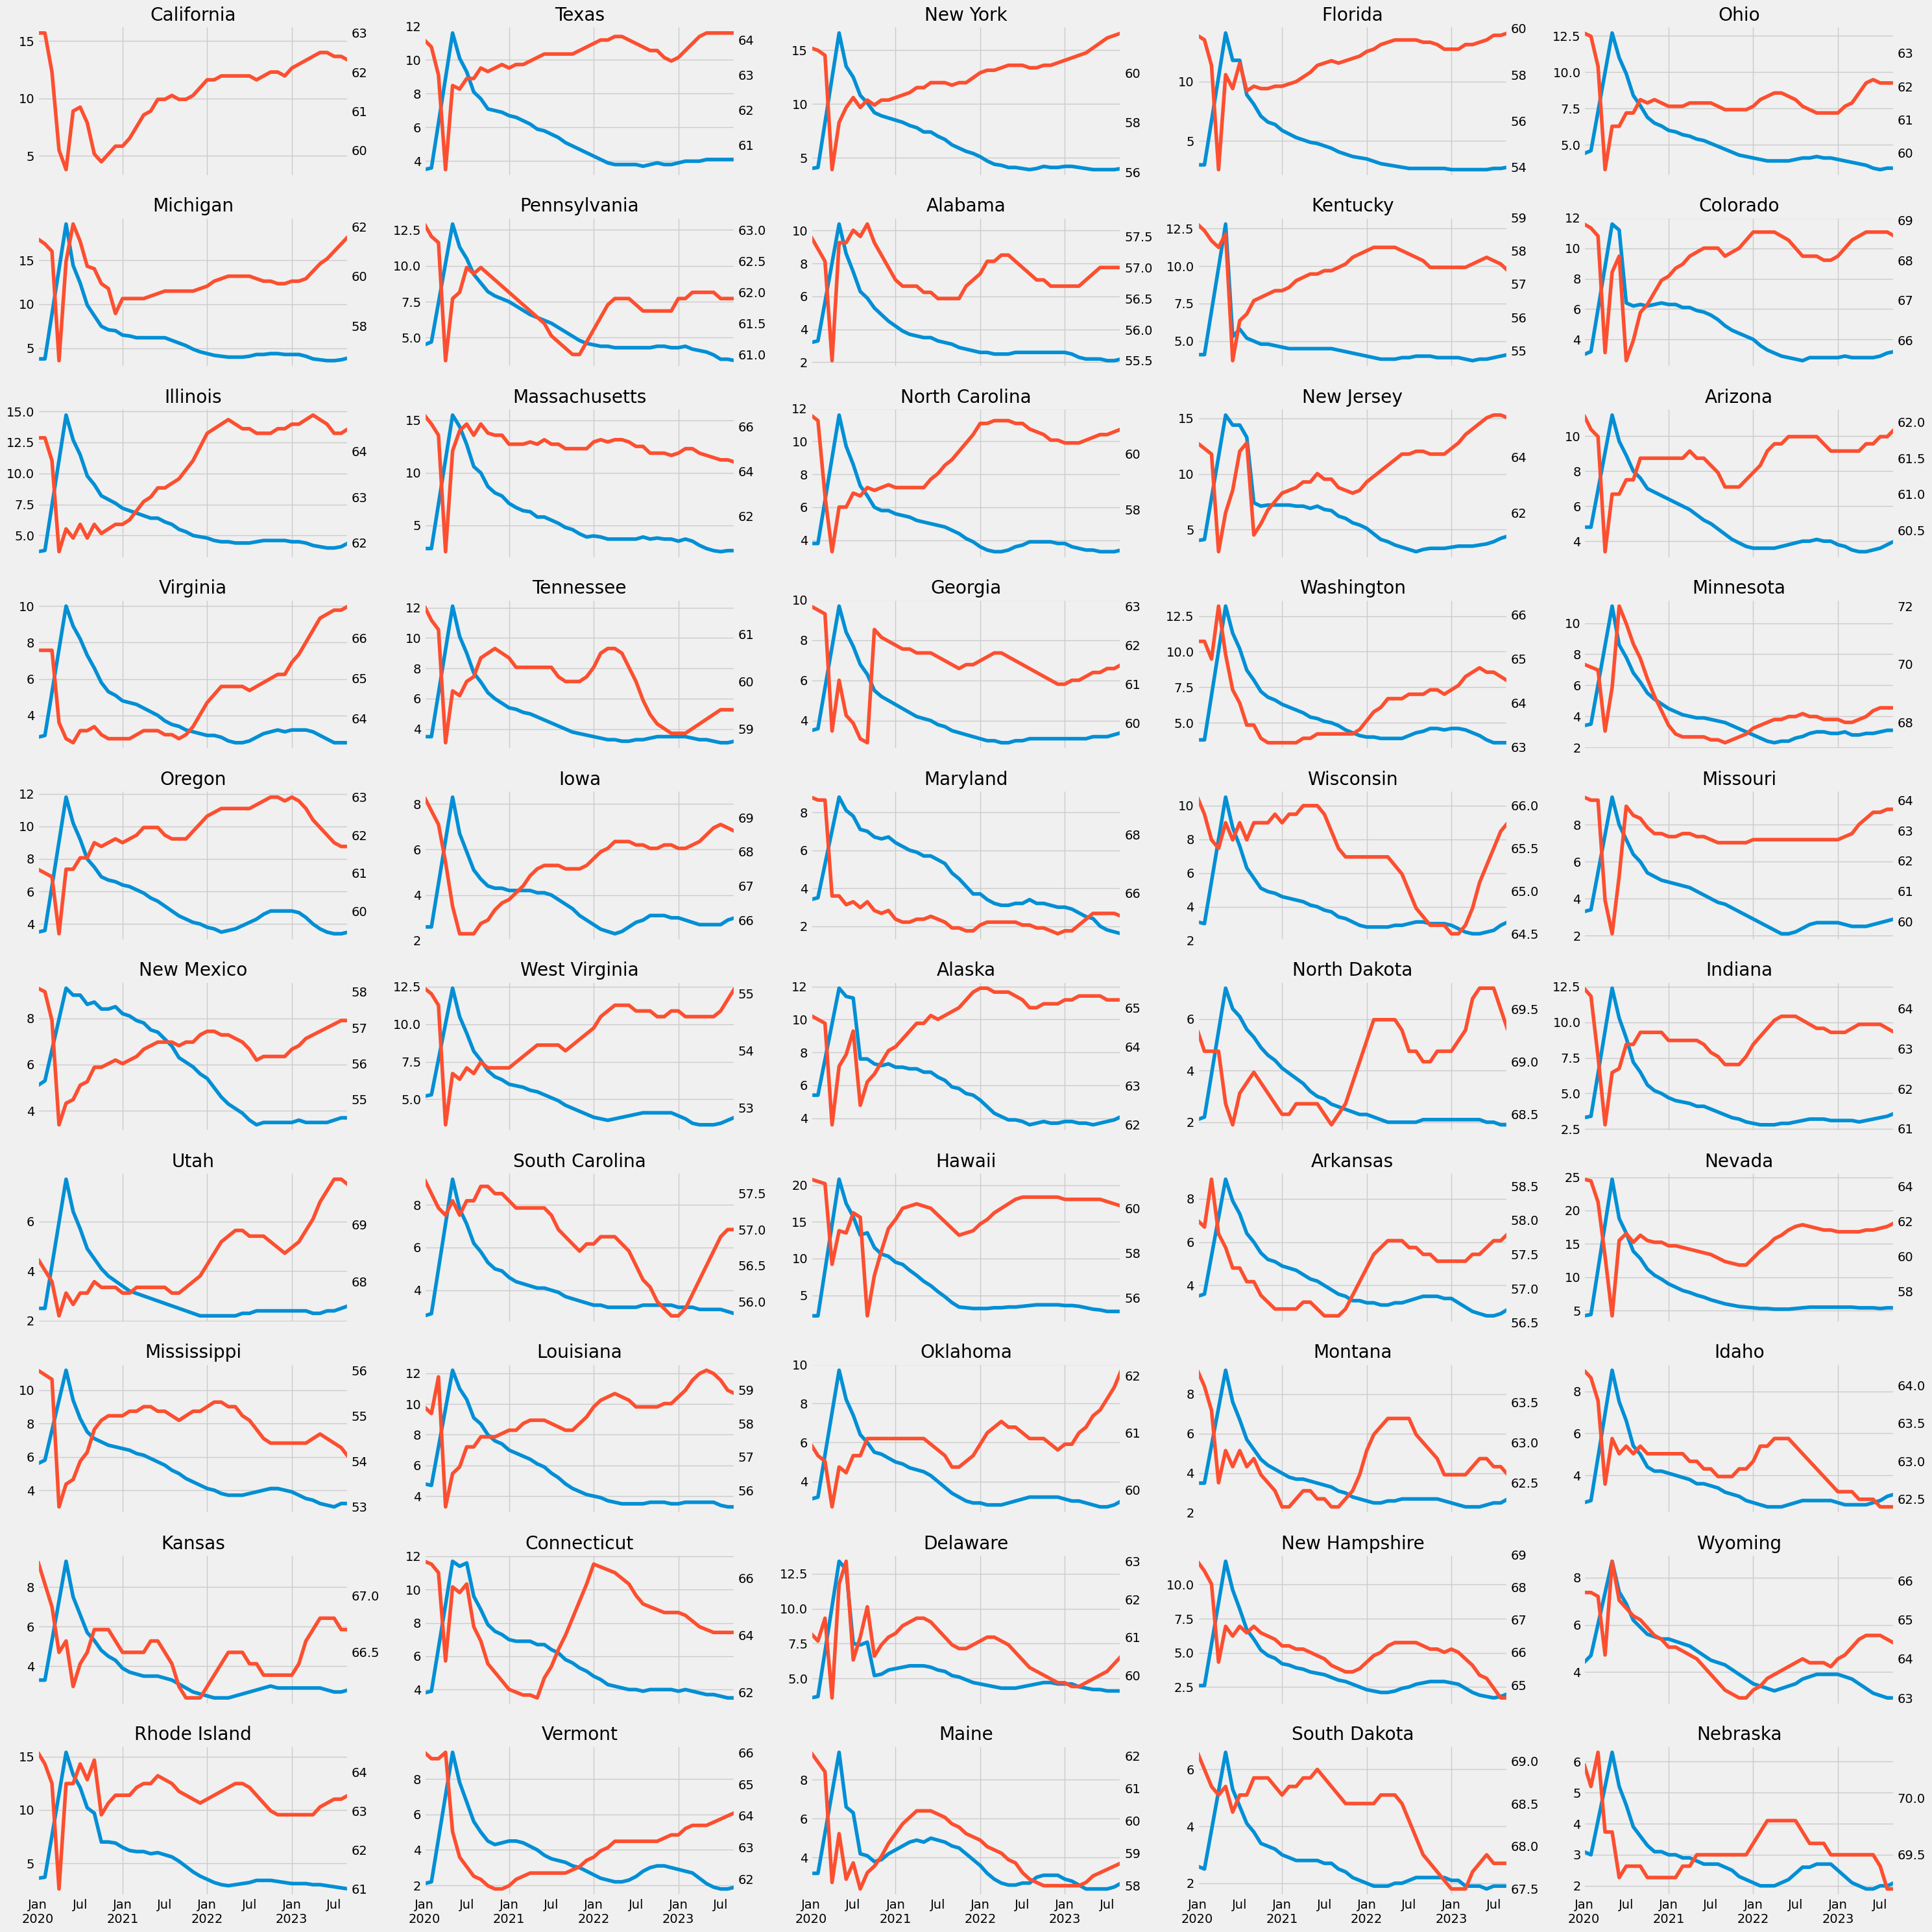

In [49]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2024')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2024')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

## Isolating the Illinois graph  

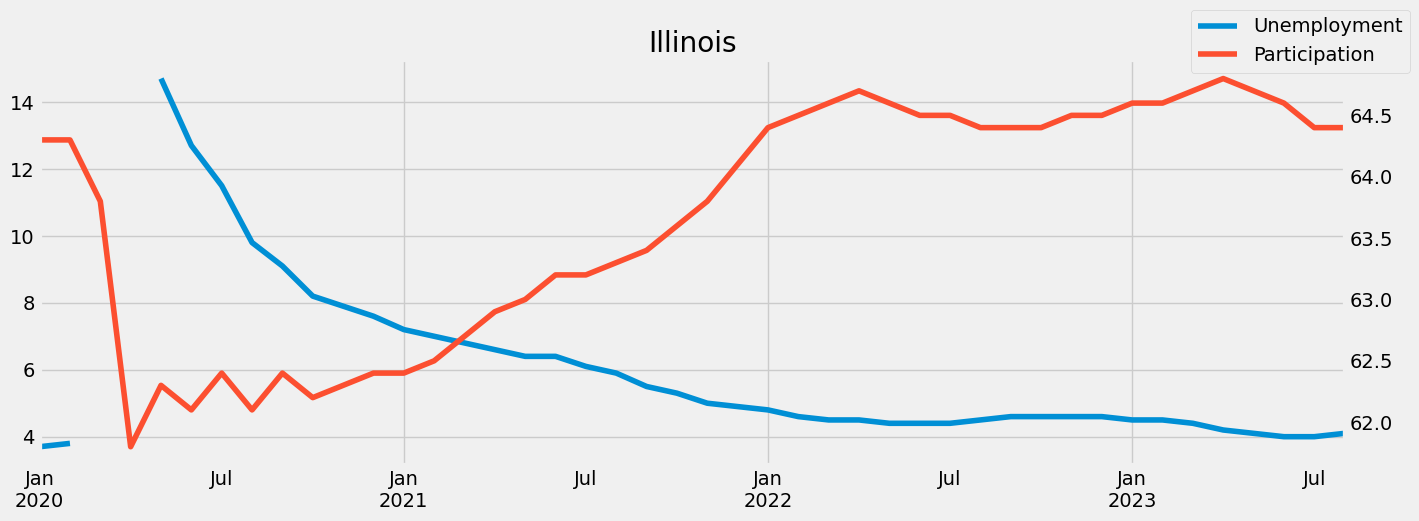

In [44]:
state = 'Illinois'
fig, ax = plt.subplots(figsize=(15, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2024')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2024')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()

    Illinois seems to be improving ever since 2021, after reaching record high unemployment rates in 2020, with a growing participation rate acompanied with a lowering unempolyment rate going into 2024.  